# K-Means: Step by Step

The algorithm works iteratively to assign each `point` (the rows of our input set form a coordinate) one of `K` groups based on its characteristics. They are grouped based on the similarity of their features (the columns). As a result of executing the algorithm we will have:

* The `centroids` of each group that will be some `coordinates` of each of the K sets that will be used to be able to label new samples.
* Labels for the training data set. Each label belongs to one of the K groups formed.

The groups are defined organically, that is to say that `their position is adjusted in each iteration of the process`, until the algorithm converges. Once the centroids have been found, we must analyze them to see what their unique characteristics are, compared to that of the other groups. These groups are the labels that the algorithm generates.

### Input Data for K-Means

The features or characteristics that we will use as inputs to apply the k-means algorithm must have numerical values, continuous as far as possible. In the case of categorical values (for example, Man/Woman or Science Fiction, Terror, Novel, etc) you can try to pass it to a numerical value, but it is not recommended because there is no `real distance` -as in the case of genres of movie or books. It is also recommended that the values used are normalized, maintaining the same scale. In some cases, percentage data also works better than absolute data. It is not convenient to use features that are correlated or that are scalars of others.

### The K-means Algorithm

The algorithm uses an iterative process in which the groups are adjusted to produce the final result. To execute the algorithm we must pass the data set and a value of K as input. The data set will be the characteristics or features for each point. The initial positions of the K centroids will be randomly assigned from any point in the input data set. Then iterates in two steps:

#### 1. Data Mapping Step

In this step, each row in our dataset is assigned to the closest centroid based on the squared Euclidean distance. The following formula is used (where $dist()$ is the standard Euclidean distance):

$$\arg\max_{c_i \in C} dist(c_i,x)^2$$

#### 2. Centroid update step

In this step the centroids of each group are recalculated. This is done by taking an average of all the points assigned in the previous step.

$$c_i = \frac{1}{\left | S_i \right |} \sum_{x_i \in S_i} x_i$$

#### 3. The algorithm iterates between these steps until a stopping criterion is met:
* If there are no changes in the centroids assigned to the groups,
* or if the sum of the distances is minimized,
* or a maximum number of iterations is reached.

`The algorithm converges to a result that may be a local optimum, so it will be convenient to re-run more than once with random starting points to confirm if there is a better output.`

## Example: Group Twitter users according to their personality with K-means

In [1]:
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt

from sklearn.cluster import KMeans
from mpl_toolkits.mplot3d import Axes3D
from sklearn.metrics import pairwise_distances_argmin_min

In [2]:
!gdown "1oXUTYcIMkQi9YNsiz_NyG9tXDLcdV3j6"

df = pd.read_csv("tw_dataset.csv")
df.head()

Downloading...
From: https://drive.google.com/uc?id=1oXUTYcIMkQi9YNsiz_NyG9tXDLcdV3j6
To: /content/tw_dataset.csv
100% 12.3k/12.3k [00:00<00:00, 50.9MB/s]


,user,op,co,ex,ag,ne,wordcount,category
0,3gerardpique,34.297953,28.148819,41.948819,29.370315,9.841575,37.0945,7
1,aguerosergiokun,44.986842,20.525865,37.938947,24.279098,10.362406,78.7970,7
2,albertochicote,41.733854,13.745417,38.999896,34.645521,8.836979,49.2604,4
3,AlejandroSanz,40.377154,15.377462,52.337538,31.082154,5.032231,80.4538,2
4,alfredocasero1,36.664677,19.642258,48.530806,31.138871,7.305968,47.0645,4


In [ ]:
df.user.values

array(['3gerardpique', 'aguerosergiokun', 'albertochicote',
       'AlejandroSanz', 'alfredocasero1', 'alo_oficial', 'andresiniesta8',
       'andykusnetzoff', 'andyroddick', 'andy_murray', 'AngelAlessandra',
       'antoniobanderas', 'aplusk', 'AvrilLavigne', 'BarackObama',
       'BarRefaeli', 'Berto_Romero', 'BillGates', 'britneyspears',
       'Buenafuente', 'CarlosAuryn', 'carmenelectra', 'Carrie_Br4dshaw',
       'CasillasWorld', 'celinedion', 'cesarmillan', 'CFKArgentina',
       'charliesheen', 'ChristianG_7', 'CindyCrawford', 'Clyburn',
       'CourteneyCox', 'Courtney', 'Cristiano', 'CristiPedroche',
       'DaniMateoAgain', 'DANIROVIRA', 'davidbisbal', 'David_Busta',
       'Diane_Keaton', 'DidacLee', 'drexlerjorge', 'edans',
       'EdwardNorton', 'EmWatson', 'enrique305', 'epunset', 'EvaLongoria',
       'eva_hache', 'FALCAO', 'Fergie', 'FernandezAnibal',
       'fieritacatalano', 'foofighters', 'GeorgeHWBush', 'gwenstefani',
       'GwynethPaltrow', 'heidiklum', 'HerreraB

Where:
    
* __OP:__ Openness to experience (inventive/curious vs. consistent/cautious)
* __CO:__ Conscientiousness (efficient/organized vs. easy-going/careless)
* __EX:__ Extroversion (outgoing/energetic vs. solitary/reserved)
* __AG:__ Agreeableness (friendly/compassionate vs. challenging/detached)
* __NE:__ Neuroticism (sensitive/nervous vs. secure/confident)

The file contains 9 differentiated categories (work activities) which are:

1. Actor/Actress
2. Singer
3. Model
4. TV series
5. Radio
6. Technology
7. Sports
8. Politics
9. Writer

In [ ]:
df.describe()

,op,co,ex,ag,ne,wordcount,category
count,140.000000,140.000000,140.000000,140.000000,140.000000,140.000000,140.000000
mean,44.414591,22.977135,40.764428,22.918528,8.000098,98.715484,4.050000
std,8.425723,5.816851,7.185246,7.657122,3.039248,44.714071,2.658839
min,30.020465,7.852756,18.693542,9.305985,1.030213,5.020800,1.000000
25%,38.206484,19.740299,36.095722,17.050993,6.086144,66.218475,2.000000
50%,44.507091,22.466718,41.457492,21.384554,7.839722,94.711400,3.500000
75%,49.365923,26.091606,45.197769,28.678866,9.758189,119.707925,7.000000
max,71.696129,49.637863,59.824844,40.583162,23.978462,217.183200,9.000000


In [ ]:
df.groupby('category').size()

category
1    27
2    34
3     9
4    19
5     4
6     8
7    17
8    16
9     6
dtype: int64

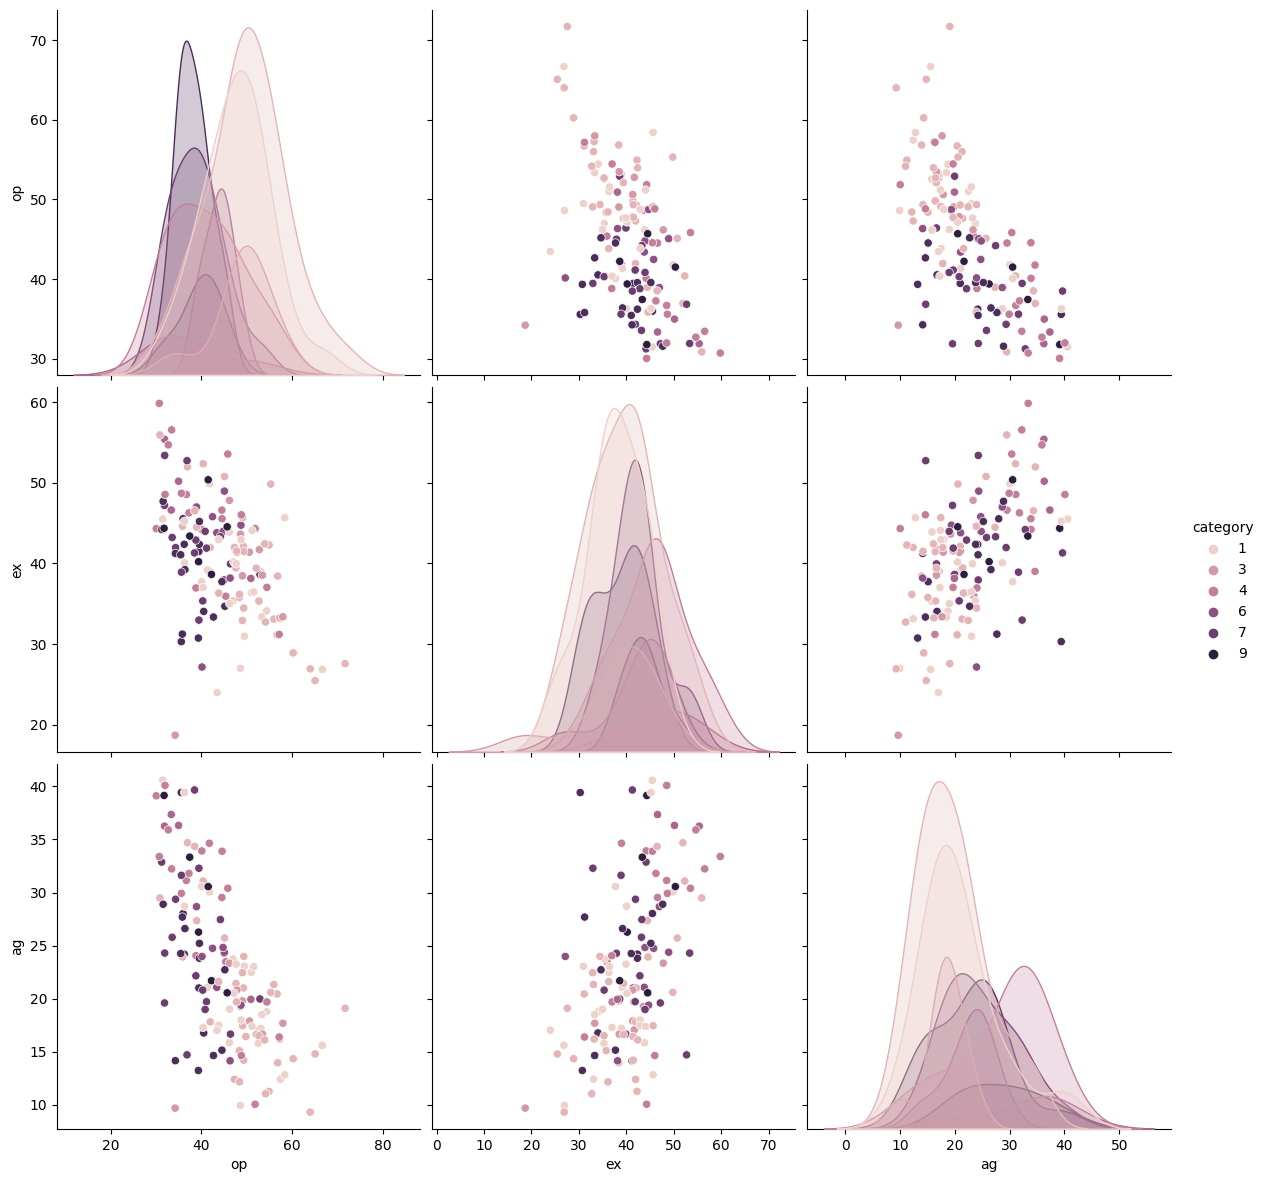

In [ ]:
sb.pairplot(df.dropna(), hue='category', height=4, vars=["op", "ex", "ag"], kind='scatter');

In [ ]:
X = np.array(df[["op", "ex", "ag"]])
y = np.array(df['category'])
X.shape

(140, 3)

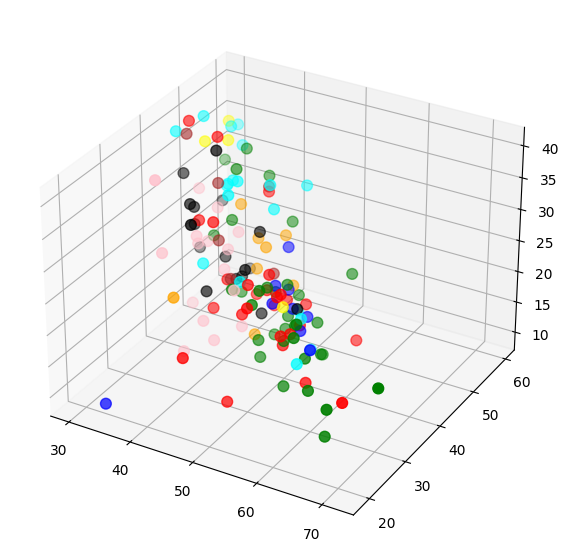

In [ ]:
fig = plt.figure(figsize=(12, 7))
ax = fig.add_subplot(111, projection="3d")
colors = ['blue', 'red', 'green', 'blue', 'cyan', 'yellow', 'orange', 'black', 'pink', 'brown', 'purple']
assing = []
for row in y:
    assing.append(colors[row])

ax.scatter(X[:, 0], X[:, 1], X[:, 2], c=assing, s=60);

### Elbow Method

In [ ]:
Sum_of_squared_distances = []
K = np.arange(1, 14)

for k in K:
    km = KMeans(n_clusters=k, n_init=10)
    km = km.fit(X)
    Sum_of_squared_distances.append(km.inertia_)

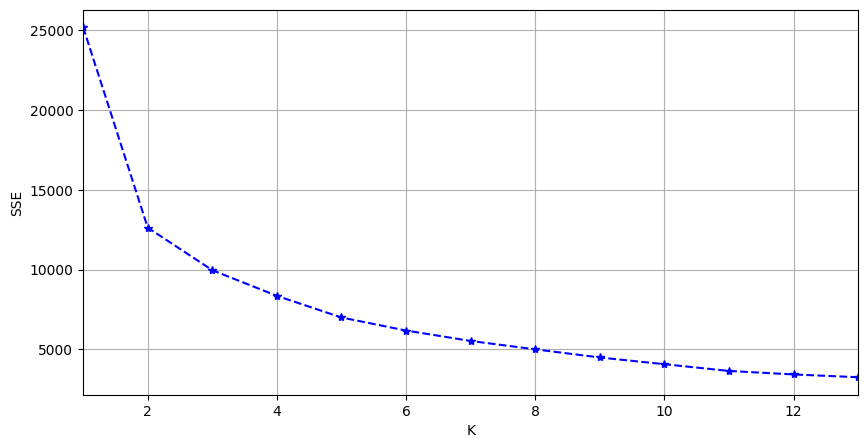

In [ ]:
plt.figure(figsize=(10, 5))
plt.ylabel("SSE")
plt.xlabel("K")
plt.xlim([1, 13])
plt.plot(K, Sum_of_squared_distances, 'b*--');
plt.grid()

In [ ]:
K = 4
kmeans = KMeans(n_clusters=K, n_init=10).fit(X)
centroids = kmeans.cluster_centers_
centroids

array([[48.34691905, 38.77023902, 17.9096488 ],
       [35.66710486, 49.09548071, 33.93645793],
       [58.58657531, 31.02839375, 15.6120435 ],
       [39.36377793, 41.61896917, 25.14100153]])

In [ ]:
labels = kmeans.predict(X)
labels

array([3, 3, 3, 1, 1, 3, 3, 1, 0, 3, 0, 3, 2, 0, 3, 0, 1, 3, 0, 1, 1, 0,
       0, 1, 0, 0, 3, 3, 3, 0, 3, 0, 0, 0, 1, 1, 1, 1, 3, 0, 3, 3, 3, 3,
       0, 2, 0, 0, 1, 1, 0, 3, 3, 2, 3, 2, 0, 0, 3, 2, 0, 3, 0, 2, 3, 3,
       2, 2, 0, 1, 3, 0, 0, 0, 3, 2, 3, 1, 1, 1, 1, 0, 2, 0, 0, 3, 0, 3,
       0, 0, 0, 3, 0, 0, 0, 3, 1, 0, 1, 0, 2, 0, 0, 1, 2, 0, 3, 3, 3, 0,
       0, 1, 1, 1, 3, 0, 0, 2, 1, 3, 0, 1, 0, 0, 2, 0, 3, 0, 0, 0, 0, 0,
       0, 3, 2, 3, 1, 2, 0, 1], dtype=int32)

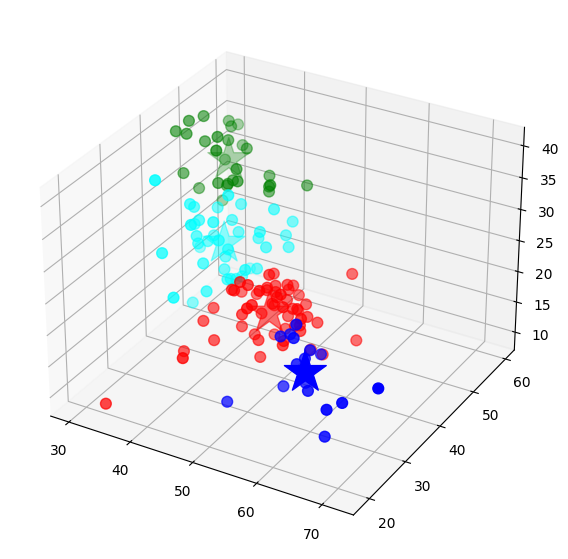

In [ ]:
# Predicting the clusters
labels = kmeans.predict(X)

# Getting the cluster centers
C = kmeans.cluster_centers_
colors = ['red', 'green', 'blue', 'cyan']
assing = []
for row in labels:
    assing.append(colors[row])

fig = plt.figure(figsize=(12, 7))
ax = fig.add_subplot(111, projection="3d")
ax.scatter(X[:, 0], X[:, 1], X[:, 2], c=assing, s=60)
ax.scatter(C[:, 0], C[:, 1], C[:, 2], marker='*', c=colors, s=1000)
plt.show()

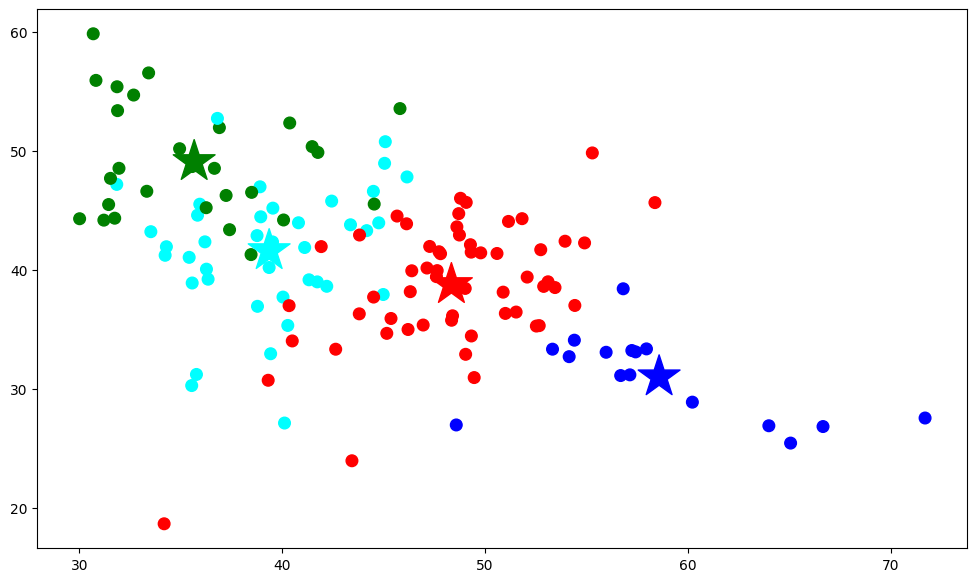

In [ ]:
f1 = df['op'].values
f2 = df['ex'].values

fig = plt.figure(figsize=(12, 7))
plt.scatter(f1, f2, c=assing, s=70)
plt.scatter(C[:, 0], C[:, 1], marker='*', c=colors, s=1000);

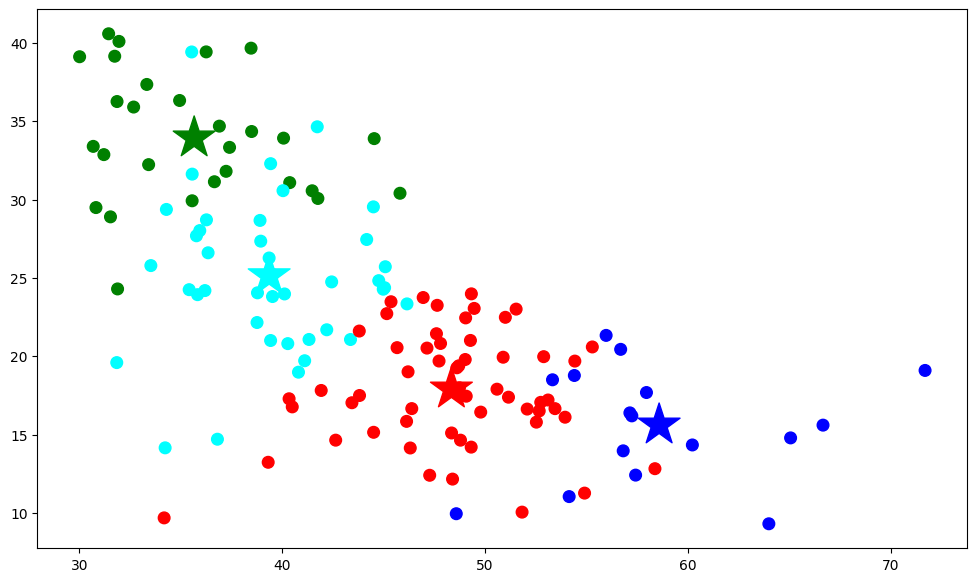

In [ ]:
f1 = df['op'].values
f2 = df['ag'].values

fig = plt.figure(figsize=(12, 7))
plt.scatter(f1, f2, c=assing, s=70)
plt.scatter(C[:, 0], C[:, 2], marker='*', c=colors, s=1000);

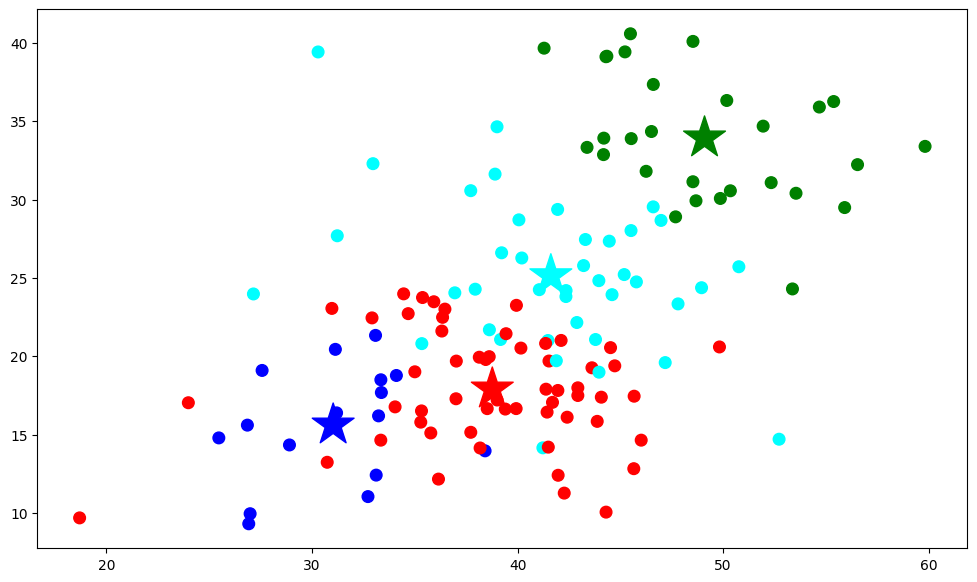

In [ ]:
f1 = df['ex'].values
f2 = df['ag'].values

fig = plt.figure(figsize=(12, 7))
plt.scatter(f1, f2, c=assing, s=70)
plt.scatter(C[:, 1], C[:, 2], marker='*', c=colors, s=1000);

In [ ]:
closest, _ = pairwise_distances_argmin_min(kmeans.cluster_centers_, X)
closest

array([29, 35, 82, 64])

In [ ]:
users = df['user'].values
for row in closest:
    print(f"{users[row]} ===> Category: {df['category'].iloc[row]}")

CindyCrawford ===> Category: 3
DaniMateoAgain ===> Category: 5
JudgeJudy ===> Category: 4
ierrejon ===> Category: 8


In [ ]:
X_new = np.array([[45.92, 57.74, 15.66]]) #davidguetta

new_labels = kmeans.predict(X_new)
print(new_labels)

[0]


### Silhouette Score

In [ ]:
import matplotlib.cm as cm

from sklearn.datasets import make_blobs
from sklearn.metrics import silhouette_samples
from sklearn.metrics import silhouette_score

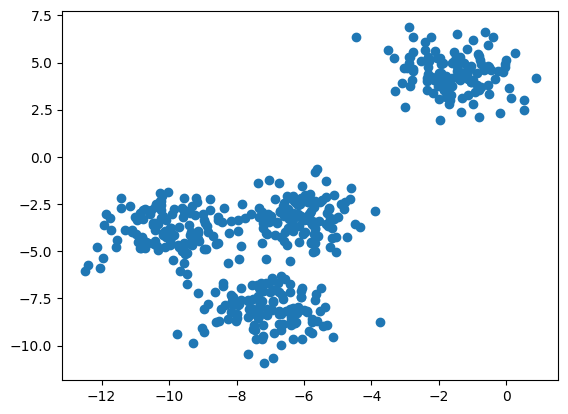

In [ ]:
X, y = make_blobs(
    n_samples=500,
    n_features=2,
    centers=4,
    cluster_std=1,
    center_box=(-10.0, 10.0),
    shuffle=True,
    random_state=1
)

K = [2, 3, 4, 5, 6]
plt.scatter(X[:, 0], X[:, 1])

For n_clusters = 2, The average silhouette_score is: 0.7049787496083262


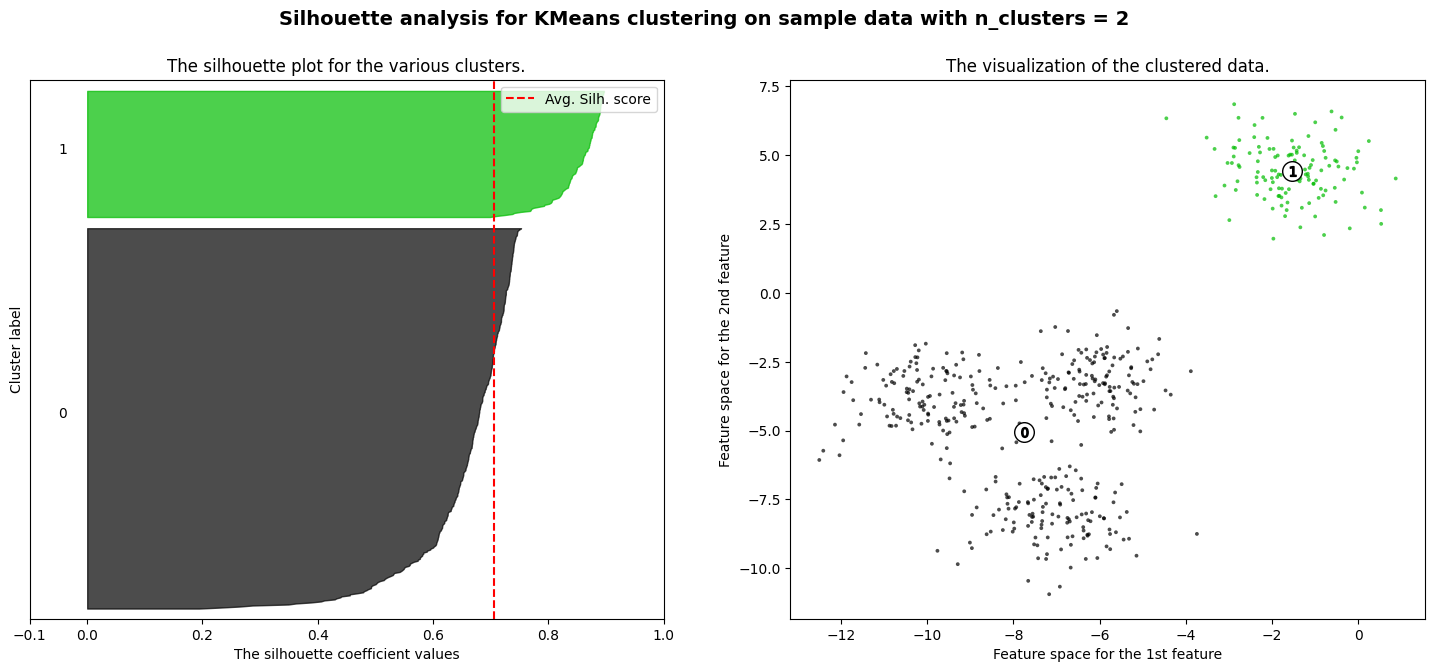

For n_clusters = 3, The average silhouette_score is: 0.5882004012129721


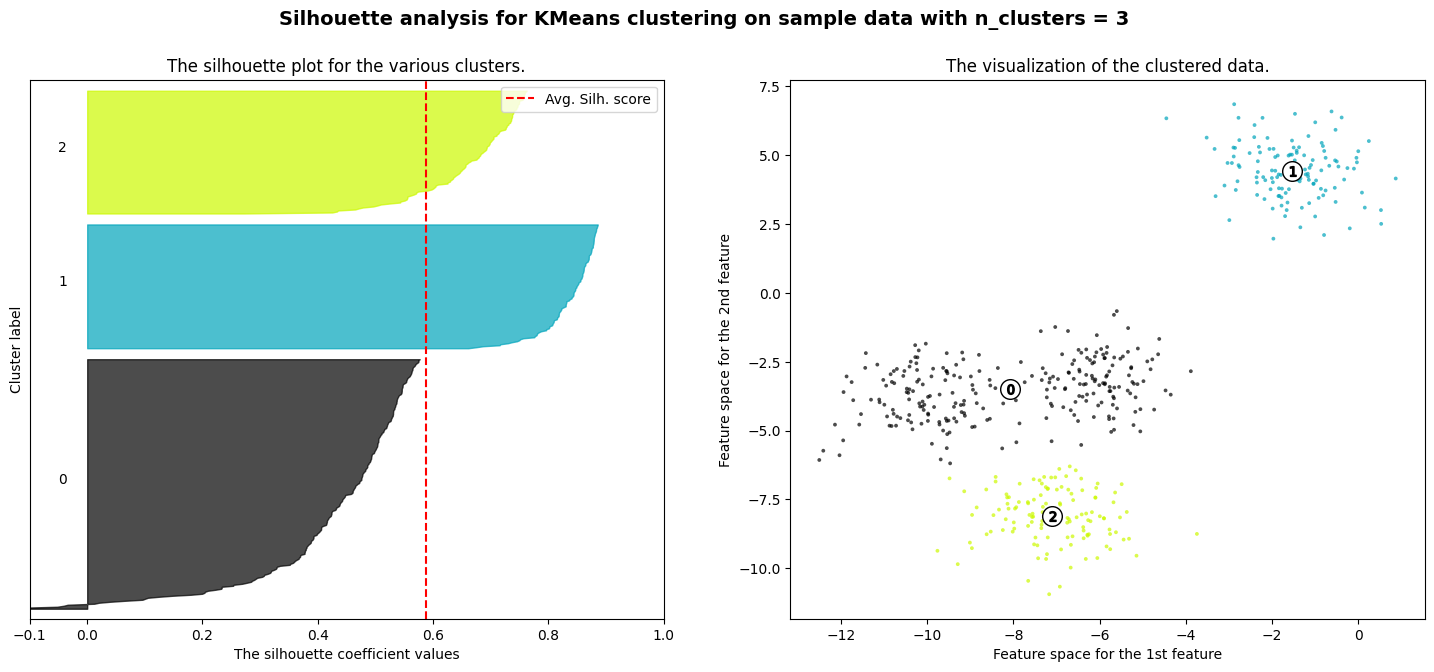

For n_clusters = 4, The average silhouette_score is: 0.6505186632729437


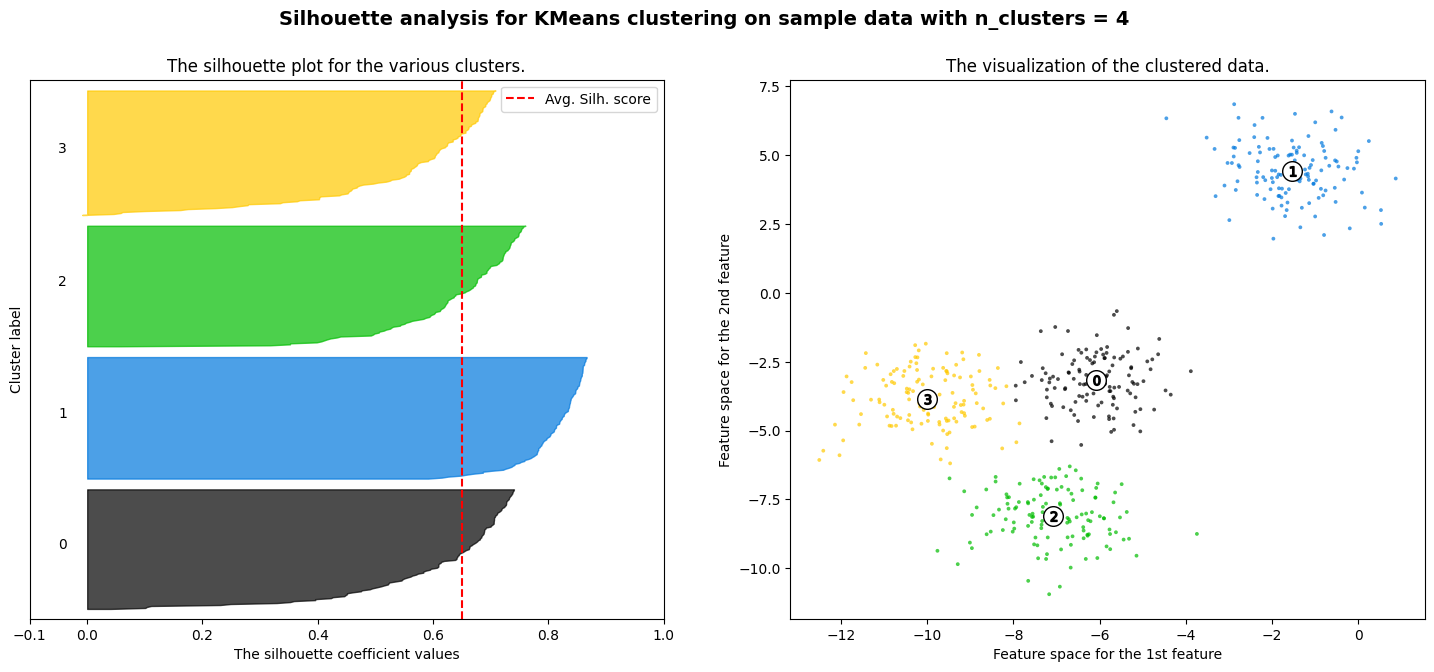

For n_clusters = 5, The average silhouette_score is: 0.56376469026194


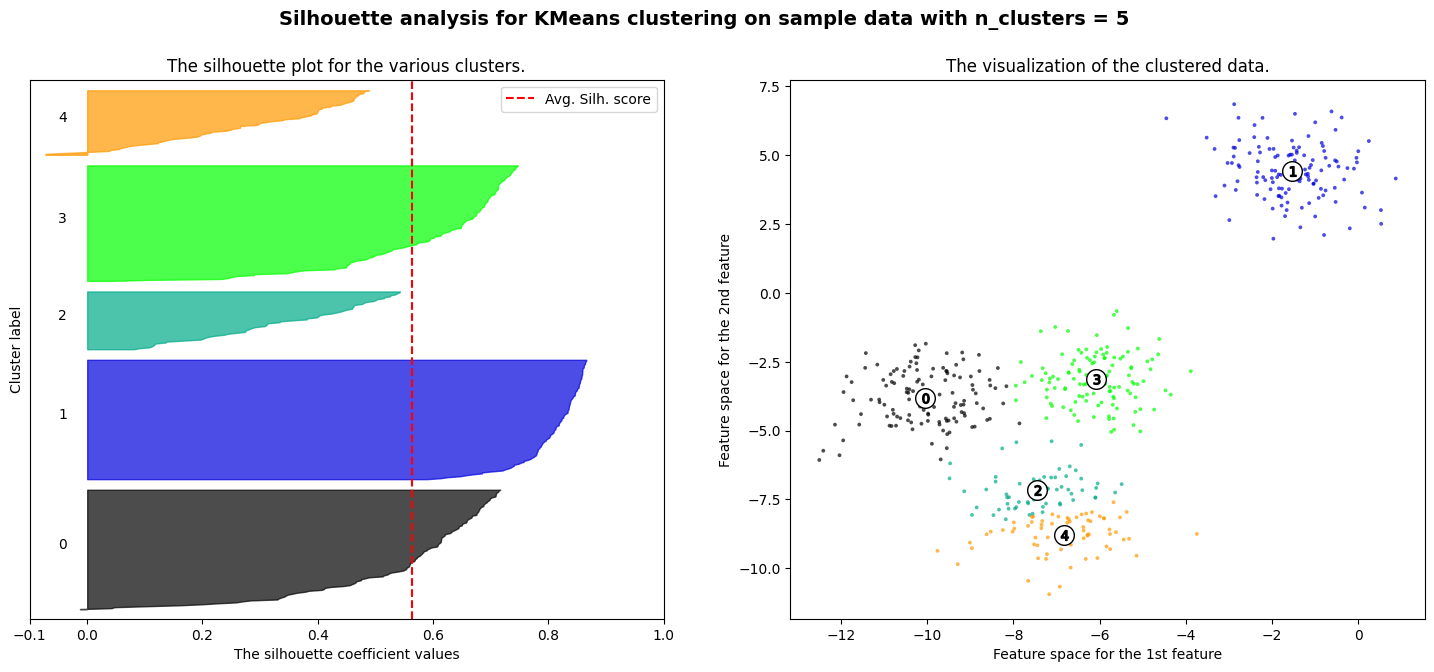

For n_clusters = 6, The average silhouette_score is: 0.4504666294372765


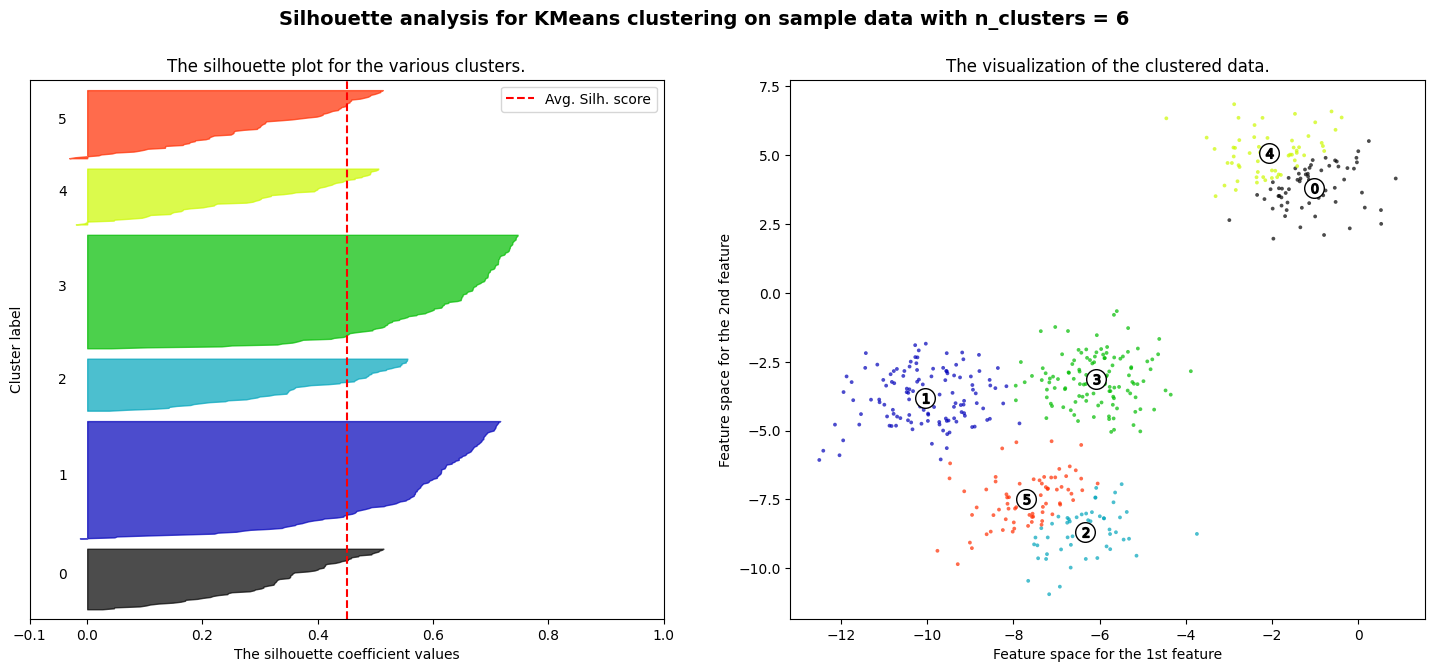

In [ ]:
avg_sil = []

for n_clusters in K:
    # Create a subplot with 1 row and 2 columns
    fig, (ax1, ax2) = plt.subplots(1, 2)
    fig.set_size_inches(18, 7)

    # The 1st subplot is the silhouette plot
    # The silhouette coefficient can range from -1, 1 but in this example all
    # lie within [-0.1, 1]
    ax1.set_xlim([-0.1, 1])
    # The (n_clusters+1)*10 is for inserting blank space between silhouette
    # plots of individual clusters, to demarcate them clearly.
    ax1.set_ylim([0, len(X) + (n_clusters + 1) * 10])

    # Initialize the clusterer with n_clusters value and a random generator
    # seed of 10 for reproducibility.
    clusterer = KMeans(n_clusters=n_clusters, random_state=10, n_init=10)
    cluster_labels = clusterer.fit_predict(X)

    # The silhouette_score gives the average value for all the samples.
    # This gives a perspective into the density and separation of the formed
    # clusters
    silhouette_avg = silhouette_score(X, cluster_labels)
    print(f"For n_clusters = {n_clusters}, The average silhouette_score is: {silhouette_avg}")

    avg_sil.append(silhouette_avg)

    # Compute the silhouette scores for each sample
    sample_silhouette_values = silhouette_samples(X, cluster_labels)

    y_lower = 10
    for i in range(n_clusters):
        # Aggregate the silhouette scores for samples belonging to
        # cluster i, and sort them
        ith_cluster_silhouette_values = sample_silhouette_values[cluster_labels == i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.nipy_spectral(float(i) / n_clusters)
        ax1.fill_betweenx(np.arange(y_lower, y_upper),
                          0, ith_cluster_silhouette_values,
                          facecolor=color, edgecolor=color, alpha=0.7)

        # Label the silhouette plots with their cluster numbers at the middle
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        # Compute the new y_lower for next plot
        y_lower = y_upper + 10  # 10 for the 0 samples

    ax1.set_title("The silhouette plot for the various clusters.")
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")

    # The vertical line for average silhouette score of all the values
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--", label='Avg. Silh. score')
    ax1.legend()

    ax1.set_yticks([])  # Clear the yaxis labels / ticks
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

    # 2nd Plot showing the actual clusters formed
    colors = cm.nipy_spectral(cluster_labels.astype(float) / n_clusters)
    ax2.scatter(X[:, 0], X[:, 1], marker='.', s=30, lw=0, alpha=0.7,
                c=colors, edgecolor='k')

    # Labeling the clusters
    centers = clusterer.cluster_centers_
    # Draw white circles at cluster centers
    ax2.scatter(centers[:, 0], centers[:, 1], marker='o',
                c="white", alpha=1, s=200, edgecolor='k')

    for i, c in enumerate(centers):
        ax2.scatter(c[0], c[1], marker='$%d$' % i, alpha=1,
                    s=50, edgecolor='k')

    ax2.set_title("The visualization of the clustered data.")
    ax2.set_xlabel("Feature space for the 1st feature")
    ax2.set_ylabel("Feature space for the 2nd feature")

    plt.suptitle(
        f"Silhouette analysis for KMeans clustering on sample data with n_clusters = {n_clusters}",
        fontsize=14, fontweight='bold'
    )
    plt.show()

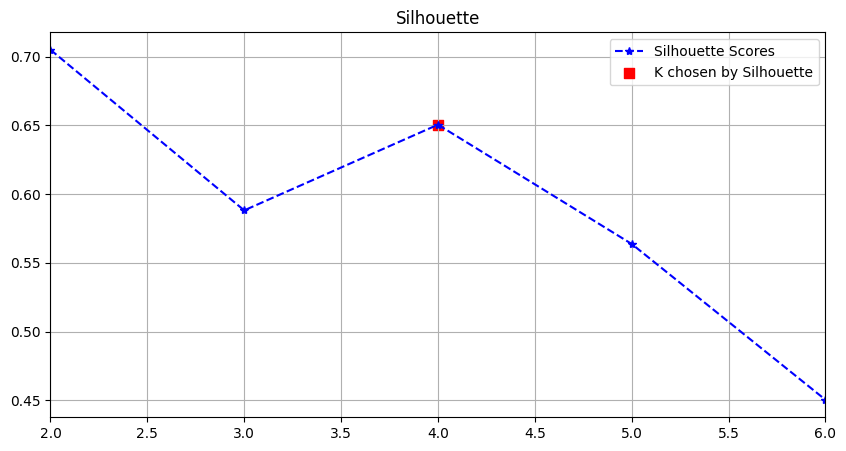

In [ ]:
plt.figure(figsize=(10,5))
plt.plot(K, avg_sil, 'b*--', label="Silhouette Scores")
plt.scatter(4, avg_sil[2], color='r', marker='s', s=60, label='K chosen by Silhouette')
plt.xlim(min(K),max(K))
plt.legend()
plt.grid()
plt.title("Silhouette")
plt.show()